## 3. Abalone Dataset

### 1. Data Cleaning and Visualisation

In [1]:
# remember to remove this
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# remember to change to the same directory
abalone = pd.read_csv("../datasets/abalone.data", header=None)
abalone

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


We can observe from the dataframe above that there are not column name attributes, but we can find them to give us a better understanding of the dataset from the UCI data source.

The abalone dataset predicts the age of the abalone (given the number of rings), from the 8 physical measurements (covariates) listed below:

Some information about the Abalone dataset and it's attributes (in order from 0-8):
- Sex (M,F,I)
- Length
- Diameter
- Height
- Whole Weight
- Shucked Weight
- Viscera Weight
- Shell Weight
- Rings (Prediction Variable)

In [3]:
# change variable names
abalone_names = ['Sex','Length','Diameter','Height','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight','Rings']
abalone.columns = abalone_names

Likewise, before we do any modelling, we first want to check if the dataset is complete or have any invalid values. From the cell below,

In [4]:
# Check for any missing values in the dataset
null_count = np.array(abalone.isnull().sum())
na_counts = np.array(abalone.isna().sum())
pd.DataFrame(np.vstack((null_count, na_counts)), columns=abalone.columns, index=['null_count','na_counts'])

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
null_count,0,0,0,0,0,0,0,0,0
na_counts,0,0,0,0,0,0,0,0,0


Great, no null or na values. Let's look at some summary statistics.

In [5]:
abalone.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


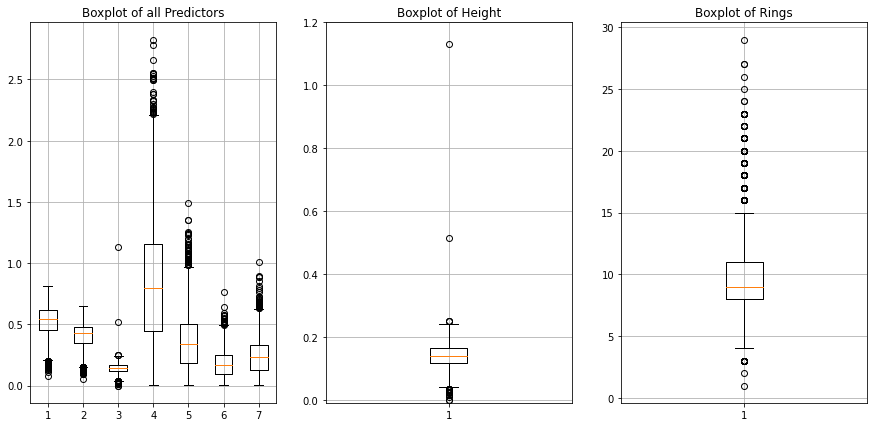

In [6]:
# plot boxplots
fig, ax = plt.subplots(1,3, figsize=(15,7))
ax[0].boxplot(abalone.iloc[:,1:8])
ax[1].boxplot(abalone.iloc[:,3])
ax[2].boxplot(abalone.iloc[:,8])
ax[1].set_ylim(-0.01,1.2)
ax[0].set_title('Boxplot of all Predictors')
ax[1].set_title('Boxplot of Height')
ax[2].set_title('Boxplot of Rings')
ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)

Looking at the summary statistics above, as well as the boxplot of all the predictors, we observe that all the predictors look okay except for the height. On, on further inspection, there are 2 things we observe.

1. There seem to be an observation(s) that have a height of 0. This value does not make sense as abalone height cannot be 0. Therefore, we may want further investigate these observations and deal with them.
2. There are also observations that are outliers that might need to be removed from the dataset

We can identify them both.

In [7]:
# Instances that are outliers for height
abalone.loc[abalone["Height"] > 0.4]

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
1417,M,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,10
2051,F,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,8


In [8]:
outliers_index = abalone.loc[abalone["Height"] > 0.4].index
abalone = abalone.drop(outliers_index)
abalone.reset_index(drop=True, inplace=True) # reset the index.

In [9]:
# Find observations that have height 0
abalone.loc[abalone["Height"] == 0]

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3994,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


There are 2 instances where height = 0, and in both cases, the abalone was identified as an infant. We can either impute these values, or remove the data. However, if we want to keep some integrity of the data, perhaps it would be better to impute the height data of these 2 observations. A good imputer might be the KNNImputer.

In [20]:
from sklearn.impute import KNNImputer

abalone.loc[abalone["Height"] == 0, "Height"] = np.nan # set the values of 0 to be nan
# before fitting the imputer, take only the numerical columns
abalone_num = abalone.iloc[:,1:9]


knn_imputer = KNNImputer(n_neighbors=5, weights="uniform") # call the imputer, use 5 neighbours
imputed_ab = pd.DataFrame(knn_imputer.fit_transform(abalone_num))
abalone_imputed = pd.concat([abalone.iloc[:,0],imputed_ab],axis=1)
abalone_imputed.columns = abalone_names
abalone_imputed

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...,...
4170,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4171,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4172,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4173,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


In [21]:
abalone_imputed.iloc[[1257,3994]]

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
1257,I,0.430,0.34,0.111,0.428,0.2065,0.0860,0.1150,8.0
3994,I,0.315,0.23,0.082,0.134,0.0575,0.0285,0.3505,6.0


The two instances that we identified earlier have now been imputed using the KNN imputer, where the height values have now been imputed and looks ok.

Looking at the pairs plot below, we can observe that there are some interesting correlations between the variables, which look to be quite linear. This is apparent for those variables that are related to each other, which are height and diameter, as well as those ones involving weight. The rings dependent variable on all the other variables seem to show no pattern between the pairs. However, we can observe that infant abalones, just like all the other variables have much smaller values compared to the adult (M and F) instances.

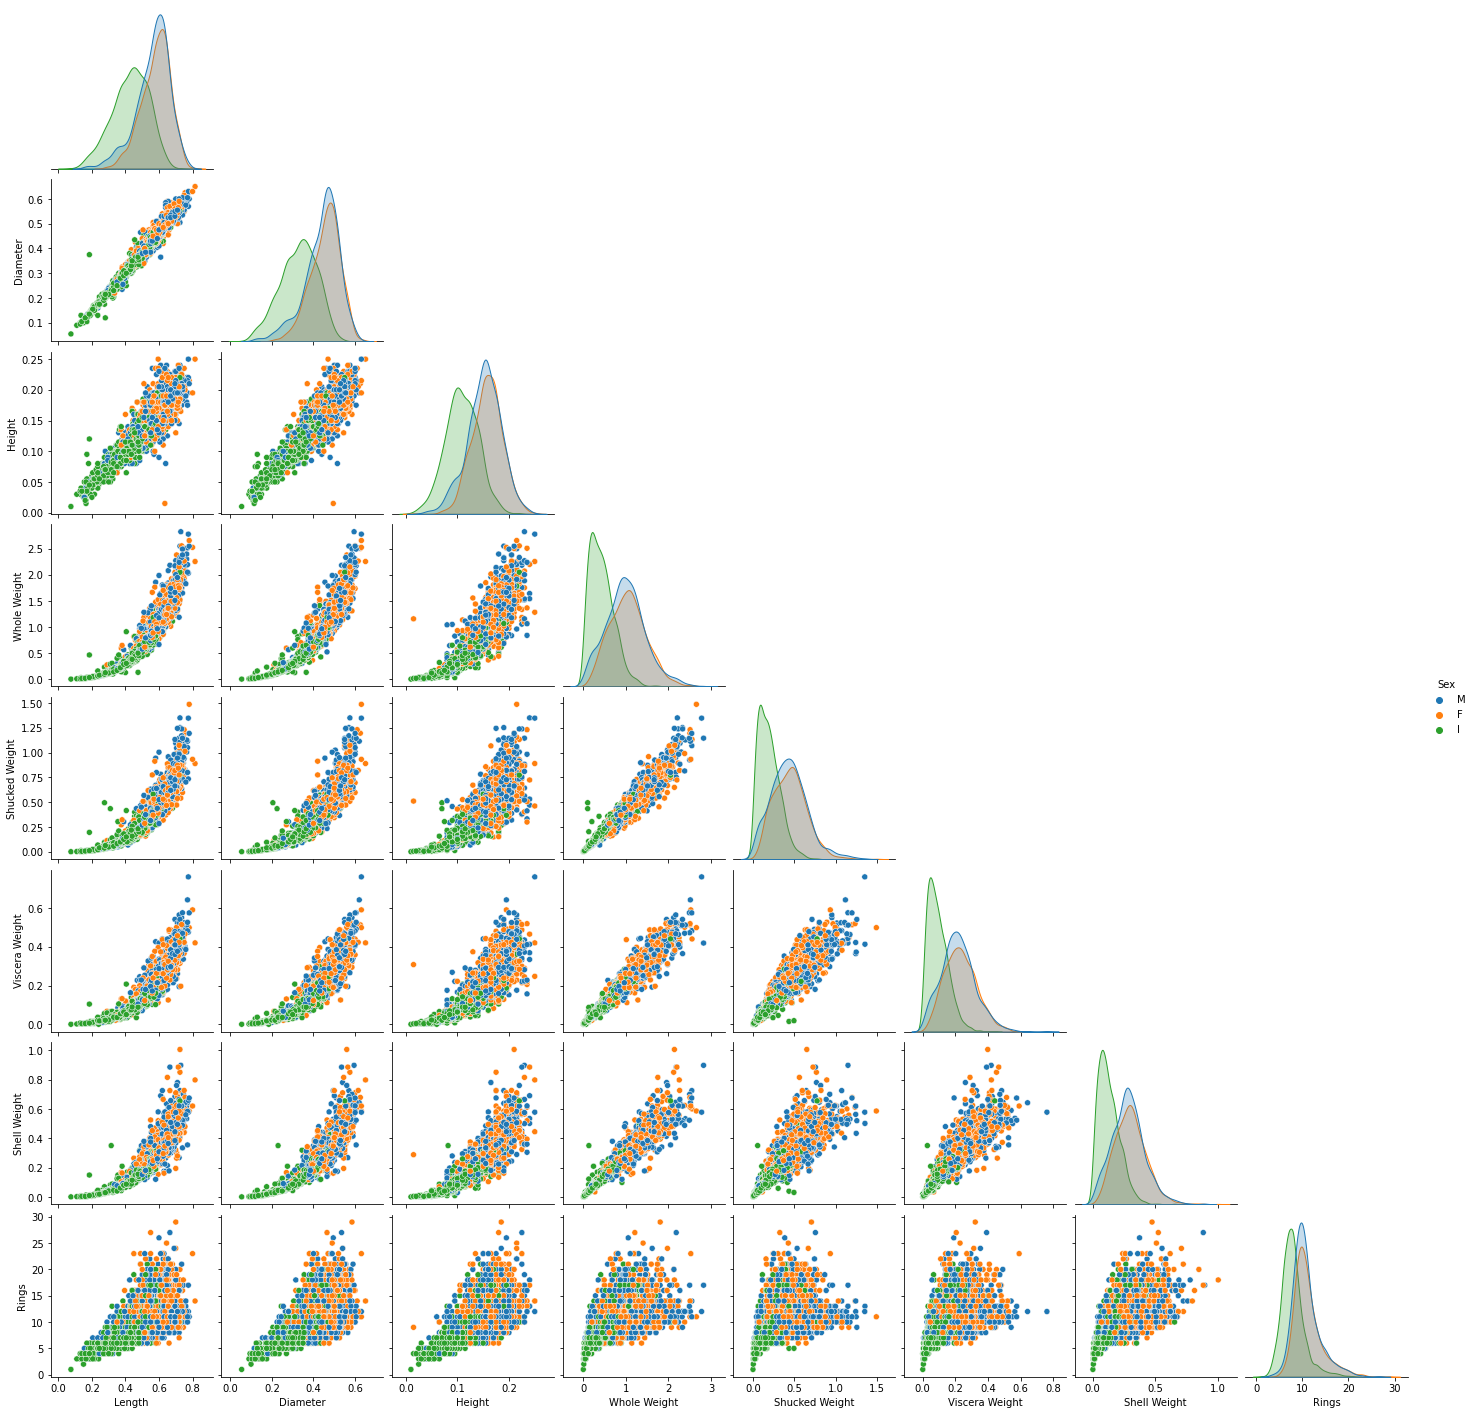

In [12]:
sns.pairplot(abalone_imputed, diag_kind = 'kde', hue='Sex', corner=True)

Using the cleaned data, on removing the outliers and imputed 0 values on height, we might want to convert the sex variable from a string type, to a numerical value. 

- 0 for infant
- 1 for male
- 2 for female

In [22]:
cleaned_abalone = abalone_imputed

In [23]:
sex_int = {'I': 0, 'M': 1, 'F': 2}
# map the sex column to the relevant numerical tags above

cleaned_abalone['Sex'] = abalone_imputed['Sex'].map(sex_int)
cleaned_abalone

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...,...
4170,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4171,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4172,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4173,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


Now, we can split our data into training and test sets for modelling.

### 2. Hyperparameter Tuning and Modelling

In [24]:
from sklearn.model_selection import train_test_split

# split the data into train and test
X = cleaned_abalone.iloc[:,0:8]
y = cleaned_abalone.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5508)

**Train a Decision Tree Regression using 3 Fold CV**

We can tune the hyperparameter of max_depth to control how deep the tree splits, where the higher the tree depth is, the more prone the tree is to overfitting.

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# create lists to save errors:
training_err, cv_err, test_err = [],[],[]

# First we tune max_depth, keeping all other hyperparameters the same:
for depth in range(2,15):
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=5508)
    tree_reg.fit(X_train, y_train)
    
    # get the score (if the observations were put classed correctly in tree)
    train_err_iter = 1 - tree_reg.score(X_train, y_train)
    test_err_iter = 1 - tree_reg.score(X_test, y_test)
    cv_err_iter = 1 - np.mean(cross_val_score(tree_reg, X_train, y_train, cv=3))
    
    # append all the values to the lists we created
    training_err.append(train_err_iter)
    cv_err.append(cv_err_iter)
    test_err.append(test_err_iter)

Text(0.5, 1.0, 'Error on Max Depth Hyperparameter')

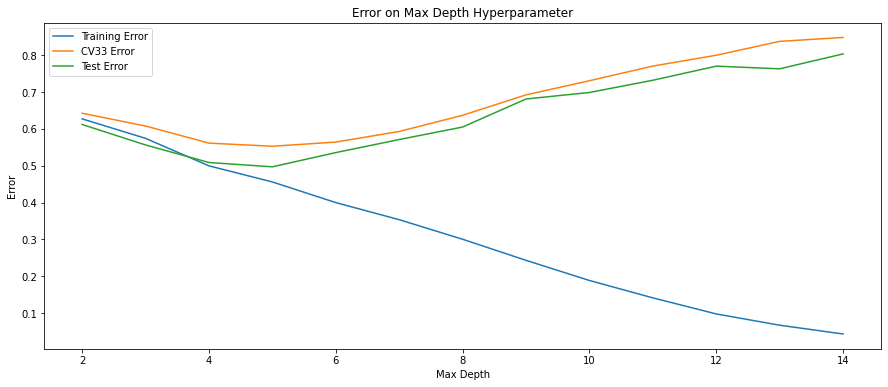

In [26]:
depths = np.arange(2,15) # max depth hyperparams we fitted

plt.figure(figsize=(15,6))
plt.plot(depths, training_err, label="Training Error")
plt.plot(depths, cv_err, label="CV33 Error")
plt.plot(depths, test_err, label="Test Error")
plt.xlabel("Max Depth")
plt.ylabel("Error")
plt.legend()
plt.title("Error on Max Depth Hyperparameter")

Looking at this plot, we can see that the error score of the CV3 and the test error start to bottom out at around tree depth of 5, and then starts to increase as the depth increases. Therefore, perhaps maybe depth 5 would be the best value to pick, for generalisability and to avoid overfitting. 

**Train a Decision Tree Regression using 3 Fold CV, tuning min_samples_leaf**

In the previous section, we have chosen max_depth to be 5, so we will fix that value to train the min_samples_leaf. We understand that perhaps by tuning the min_samples_leaf to a higher value, it will avoid overfitting the tree and improve generalisability. However, we also have to consider underfitting if the value is too small. Therefore, we want to pick a value to improve our DT regression model.

In [27]:
# create lists to save errors:
training_err, cv_err, test_err = [],[],[]

# First we tune max_depth, keeping all other hyperparameters the same:
for min_samp_leaf in range(2,80):
    tree_reg = DecisionTreeRegressor(max_depth=5, min_samples_leaf=min_samp_leaf, random_state=5508)
    tree_reg.fit(X_train, y_train)
    
    # get the score (if the observations were classed correctly in tree)
    train_err_iter = 1 - tree_reg.score(X_train, y_train)
    test_err_iter = 1 - tree_reg.score(X_test, y_test)
    cv_err_iter = 1 - np.mean(cross_val_score(tree_reg, X_train, y_train, cv=3))
    
    # append all the values to the lists we created
    training_err.append(train_err_iter)
    cv_err.append(cv_err_iter)
    test_err.append(test_err_iter)

Text(0.5, 1.0, 'Error on Min Samples Leaf Hyperparameter, with Max Depth=5')

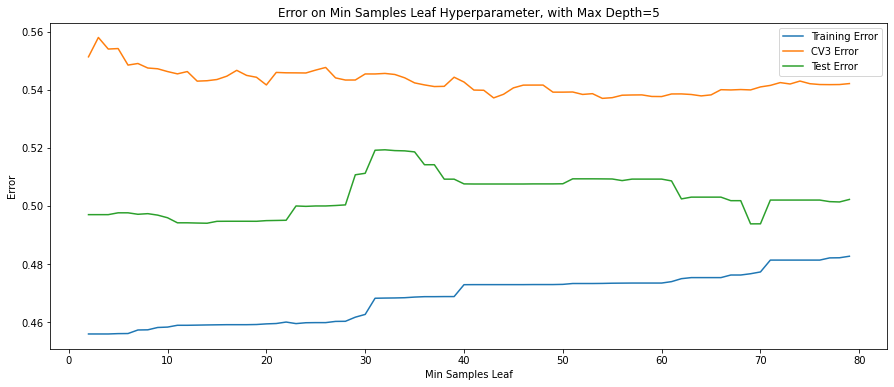

In [28]:
min_samples_leaf = np.arange(2,80) # max depth hyperparams we fitted

plt.figure(figsize=(15,6))
plt.plot(min_samples_leaf, training_err, label="Training Error")
plt.plot(min_samples_leaf, cv_err, label="CV3 Error")
plt.plot(min_samples_leaf, test_err, label="Test Error")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Error")
plt.legend()
plt.title("Error on Min Samples Leaf Hyperparameter, with Max Depth=5")

As expected, we see that the errors starts to rise as the number of samples per leaf increases. Looking at the training and the test error line plots, we can see that there is a spike in the error around the 30 min samples per leaf mark, which could signal overfitting. Therefore, we perhaps would pick a number somewhere around 25.

**Implementing a Random Forest Regressor with 500 estimators**

Keeping the hyperparameters of max_depth and min_samples_leaf to 5 and 8 respectively, we can then implement the random forest regressor and tune the other hyperparameters to find the optimal model.

In [29]:
from sklearn.ensemble import RandomForestRegressor

rand_forest_model = RandomForestRegressor(n_estimators=500, max_depth=5, min_samples_leaf=25, random_state=5508)
# testing the base model with no other hyperparameter:

In [30]:
def train_test_rmse(model, X_train, y_train, X_test, y_test, option='rmse'):
    model.fit(X_train, y_train) # fit the model first
    train_pred = np.round(model.predict(X_train)) # round up or down to the nearest integer.
    test_pred =  np.round(model.predict(X_test))
    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, test_pred, squared=False)
    if option == 'rmse':
        return(train_rmse, test_rmse)
    elif option == 'predict':
        return(train_pred, test_pred)
    elif option == 'all':
         return(train_rmse, test_rmse, train_pred, test_pred)
        
base_train_rmse, base_test_rmse = train_test_rmse(rand_forest_model,X_train, y_train, X_test, y_test)
print(f'Base Training RMSE:{base_train_rmse}, Base Test RMSE: {base_test_rmse}')

Base Training RMSE:2.1223165960653962, Base Test RMSE: 2.1731286290225693


**Manually testing with max_samples and Bootstrap**

In the Scikit documentation, the random forest regressor considers many other hyperparamters to tune and vary the trees. We will consider 2 features, bootstrap and max_samples.
- Bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
- max_samples: If bootstrap is True, the number of samples to draw from X to train each base estimator.
    - Should be a float from 0.0 to 1.0

In [31]:
# Using bootstrap and max_samples 
max_samples_range = [0.1, 0.25, 0.5, 0.75, 1] # percentage of the dataset used by bootstrap

for percent in max_samples_range:
    model = RandomForestRegressor(n_estimators=500, max_depth=5, min_samples_leaf=25, bootstrap=True,
                                  max_samples=percent, random_state=5508)
    train_rmse, test_rmse = train_test_rmse(model, X_train, y_train, X_test, y_test)
    print(f'Bootstrap Size {percent}: Training RMSE:{train_rmse}, Test RMSE: {test_rmse}')

Bootstrap Size 0.1: Training RMSE:2.302699264078828, Test RMSE: 2.2885889874394283
Bootstrap Size 0.25: Training RMSE:2.1804191647329216, Test RMSE: 2.189215265083359
Bootstrap Size 0.5: Training RMSE:2.1427363470542984, Test RMSE: 2.181186777324619
Bootstrap Size 0.75: Training RMSE:2.1283505318605886, Test RMSE: 2.180089692783428
Bootstrap Size 1: Training RMSE:3.217588360725395, Test RMSE: 3.2672069338083496


Looks like all the bootstrap sizes do not have test RMSE scores that does better than the base model, so we still select the base model as our preferred model for the random forest regressor model.

**Manually testing with max_features**

We tune this parameter to control the number of features to consider when looking for the best split. This can be given by an integer. Since we have 8 features, we will try 1-8.

In [32]:
# number of features to test
feature_range = np.arange(1,9)

for n_features in feature_range:
    model = RandomForestRegressor(n_estimators=500, max_depth=5, min_samples_leaf=25, 
                                  max_features=n_features, random_state=5508)
    train_rmse, test_rmse = train_test_rmse(model, X_train, y_train, X_test, y_test)
    print(f'Feature = {n_features}: Training RMSE:{train_rmse}, Test RMSE: {test_rmse}')

Feature = 1: Training RMSE:2.3663247181922955, Test RMSE: 2.4236342937400153
Feature = 2: Training RMSE:2.268541292138528, Test RMSE: 2.364678950529006
Feature = 3: Training RMSE:2.200107612413692, Test RMSE: 2.3114719793507694
Feature = 4: Training RMSE:2.173038645774982, Test RMSE: 2.266178763513101
Feature = 5: Training RMSE:2.148844108673821, Test RMSE: 2.248160687157194
Feature = 6: Training RMSE:2.130666726399355, Test RMSE: 2.1964884255348975
Feature = 7: Training RMSE:2.1215196314875153, Test RMSE: 2.1884866196096624
Feature = 8: Training RMSE:2.1223165960653962, Test RMSE: 2.1731286290225693


Looking at the data above, we can see that using all features might be the best solution, which is the same as the baseline model.

**Feature Selection**

Feature selection is important as it allows iis to reduce the number of dimensions of our feature space on predictions. If a feature does not contribute in a statistically significant way on our dependent variable, then we can perhaps drop them to improve our model performance and also reduce overfitting.

We can use the feature_selection module to help us identify which predictors can be dropped and for the purposes of this assignment, we use the SelectFromModel algorithm. 

The above algorithm is a "Meta-transformer for selecting features based on importance weights".

In [33]:
from sklearn.feature_selection import SelectFromModel

model_opt = RandomForestRegressor(n_estimators=500, max_depth=5, min_samples_leaf=25, 
                                  max_features=8, random_state=5508)
model_opt.fit(X_train, y_train)
# Create the selection model to find the best features
selection_model = SelectFromModel(model_opt, threshold=0.05)

In [34]:
# finding the feature importances manually, call from the model itself
features = abalone_names[:-1]
importance = pd.DataFrame({'Features':features,'Importance':model_opt.feature_importances_})
importance

,Features,Importance
0,Sex,0.025266
1,Length,0.008255
2,Diameter,0.013984
3,Height,0.012458
4,Whole Weight,0.012783
5,Shucked Weight,0.135061
6,Viscera Weight,0.007165
7,Shell Weight,0.785027


In [35]:
# Identifying the features that have importance values of more than 0.05
importance.loc[importance["Importance"] > 0.05]

,Features,Importance
5,Shucked Weight,0.135061
7,Shell Weight,0.785027


**Features kept:**
- Shucked Weight (0.135)
- Shell Weight (0.7850)

**Features removed:**
- Sex
- Length
- Diameter
- Height
- Whole Weight
- Viscera Weight

The importance of shell weight (0.785) on number of rings is huge, compared to the shucked weight of 0.135. Therefore the total importance value that is retained is:

In [36]:
imp_sum = importance.loc[importance["Importance"] > 0.05].sum()
print(f'Feature Importance Retained: {imp_sum[1]}')

Feature Importance Retained: 0.920088777619321


In [37]:
#We can use the select from model library to fit transform our X train and X test datasets directly.
X_train_selected = selection_model.transform(X_train.values)
X_test_selected = selection_model.transform(X_test.values)

Upon transforming the training and test X data, to include only the features that we have selected. We can train the random forest regressor again to find the best model that gives us best RMSE error.

Text(0.5, 1.0, 'Error on Max Depth Hyperparameter')

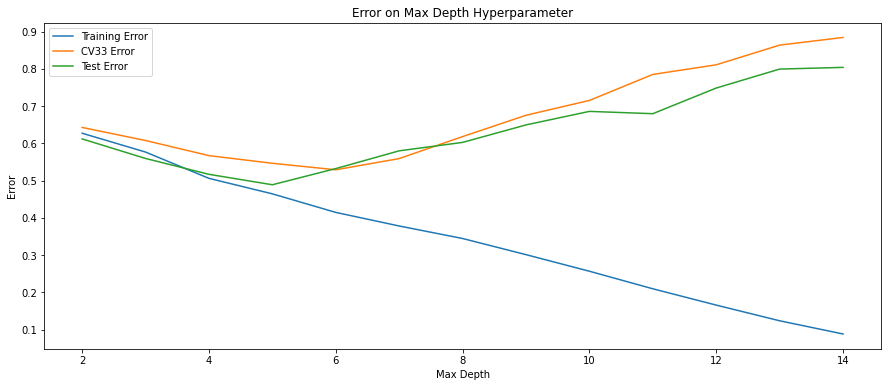

In [38]:
# Start again with the base model, to find the best max_depth
training_err, cv_err, test_err = [],[],[]

# First we tune max_depth, keeping all other hyperparameters the same:
for depth in range(2,15):
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=5508)
    tree_reg.fit(X_train_selected, y_train)
    
    # get the score (if the observations were put classed correctly in tree)
    train_err_iter = 1 - tree_reg.score(X_train_selected, y_train)
    test_err_iter = 1 - tree_reg.score(X_test_selected, y_test)
    cv_err_iter = 1 - np.mean(cross_val_score(tree_reg, X_train_selected, y_train, cv=3))
    
    # append all the values to the lists we created
    training_err.append(train_err_iter)
    cv_err.append(cv_err_iter)
    test_err.append(test_err_iter)
    
depths = np.arange(2,15) # max depth hyperparams we fitted
plt.figure(figsize=(15,6))
plt.plot(depths, training_err, label="Training Error")
plt.plot(depths, cv_err, label="CV33 Error")
plt.plot(depths, test_err, label="Test Error")
plt.xlabel("Max Depth")
plt.ylabel("Error")
plt.legend()
plt.title("Error on Max Depth Hyperparameter")

Like the model with all the predictors, we can still see that the "optimal" max_depth might still be 5.

Text(0.5, 1.0, 'Error on Min Samples Leaf Hyperparameter, with Max Depth=5')

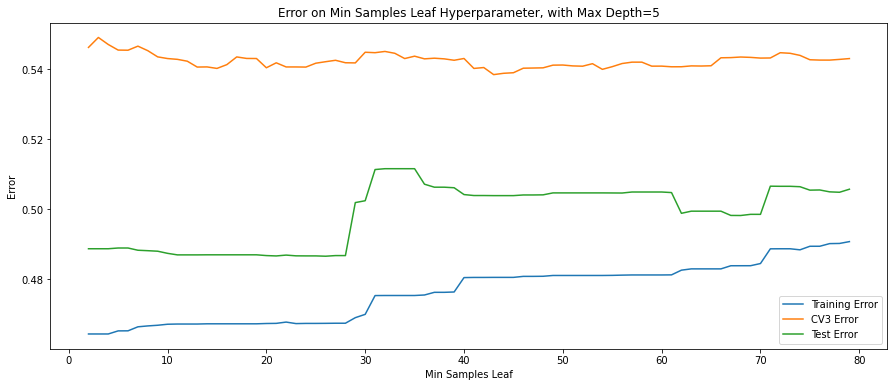

In [39]:
# create lists to save errors:
training_err, cv_err, test_err = [],[],[]

# First we tune max_depth, keeping all other hyperparameters the same:
for min_samp_leaf in range(2,80):
    tree_reg = DecisionTreeRegressor(max_depth=5, min_samples_leaf=min_samp_leaf, random_state=5508)
    tree_reg.fit(X_train_selected, y_train)
    
    # get the score (if the observations were classed correctly in tree)
    train_err_iter = 1 - tree_reg.score(X_train_selected, y_train)
    test_err_iter = 1 - tree_reg.score(X_test_selected, y_test)
    cv_err_iter = 1 - np.mean(cross_val_score(tree_reg, X_train_selected, y_train, cv=3))
    
    # append all the values to the lists we created
    training_err.append(train_err_iter)
    cv_err.append(cv_err_iter)
    test_err.append(test_err_iter)

min_samples_leaf = np.arange(2,80) # max depth hyperparams we fitted
plt.figure(figsize=(15,6))
plt.plot(min_samples_leaf, training_err, label="Training Error")
plt.plot(min_samples_leaf, cv_err, label="CV3 Error")
plt.plot(min_samples_leaf, test_err, label="Test Error")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Error")
plt.legend()
plt.title("Error on Min Samples Leaf Hyperparameter, with Max Depth=5")

Likewise, we try to find the best hyperparameters for max_depth and min_samples_leaf, where looking at the 2 graphs above, it looks like we retain the 2 selected values, 5 and 25 respectively.

In [40]:
# Training the base model again:
rand_forest_model = RandomForestRegressor(n_estimators=500, max_depth=5, min_samples_leaf=25, random_state=5508)
base_train_rmse, base_test_rmse = train_test_rmse(rand_forest_model,X_train_selected, y_train, X_test_selected, y_test)
print(f'Base Training RMSE:{base_train_rmse}, Base Test RMSE: {base_test_rmse}')

Base Training RMSE:2.1675192725945416, Base Test RMSE: 2.1935820551907477


Comparing the base training RMSE and the base test RMSE from the full features to the reduced features, we can see that the RMSE is higher for the reduced! However, the increase is not very significant as can perhaps attribute this to the huge importance of shell weight.

Additionally, we can also try to find the best max samples and number of features.

In [41]:
# Using bootstrap and max_samples 
max_samples_range = [0.1, 0.25, 0.5, 0.75, 1] # percentage of the dataset used by bootstrap

for percent in max_samples_range:
    model = RandomForestRegressor(n_estimators=500, max_depth=5, min_samples_leaf=25, bootstrap=True,
                                  max_samples=percent, random_state=5508)
    train_rmse, test_rmse = train_test_rmse(model, X_train_selected, y_train, X_test_selected, y_test)
    print(f'Bootstrap Size {percent}: Training RMSE: {train_rmse}, Test RMSE: {test_rmse}')

Bootstrap Size 0.1: Training RMSE: 2.306795998572574, Test RMSE: 2.2837055424867474
Bootstrap Size 0.25: Training RMSE: 2.2165082181095137, Test RMSE: 2.188122205883115
Bootstrap Size 0.5: Training RMSE: 2.1857125488294393, Test RMSE: 2.193945562038084
Bootstrap Size 0.75: Training RMSE: 2.1718061208084527, Test RMSE: 2.196125339587209
Bootstrap Size 1: Training RMSE: 3.217588360725395, Test RMSE: 3.2672069338083496


The bootstrap size of 0.25 max_samples give us a slightly better RMSE for the test set. We can then fix this value to then find the max_features hyperparameters, and find that using all features return the best RMSE value.

In [42]:
# number of features to test
feature_range = np.arange(1,3)

for n_features in feature_range:
    model = RandomForestRegressor(n_estimators=500, max_depth=5, min_samples_leaf=25, 
                                  max_features=n_features, random_state=5508, bootstrap=True,
                                  max_samples=0.25)
    train_rmse, test_rmse = train_test_rmse(model, X_train_selected, y_train, X_test_selected, y_test)
    print(f'Feature = {n_features}: Training RMSE: {train_rmse}, Test RMSE: {test_rmse}')

Feature = 1: Training RMSE: 2.304045263710461, Test RMSE: 2.300752251990612
Feature = 2: Training RMSE: 2.2165082181095137, Test RMSE: 2.188122205883115


**Comparing the Performance of the 2 Random Forest Regressors**

In [43]:
model_opt = RandomForestRegressor(n_estimators=500, max_depth=5, min_samples_leaf=25, 
                                  max_features=8, random_state=5508)
model_selected = RandomForestRegressor(n_estimators=500, max_depth=5, min_samples_leaf=25, bootstrap=True,
                                  max_samples=0.25, random_state=5508)
# fit the 2 models
model_opt.fit(X_train, y_train)
model_selected.fit(X_train_selected, y_train)

RandomForestRegressor(max_depth=5, max_samples=0.25, min_samples_leaf=25,
                      n_estimators=500, random_state=5508)

In [44]:
# get the predictions of the models and then round to the nearest integer.
pred_test = np.round(model_opt.predict(X_test))
pred_test_selected = np.round(model_selected.predict(X_test_selected))

forest_error = pd.DataFrame({'Full Random Forest Error': np.abs(y_test-pred_test),
              'Selected Random Forest Error':np.abs(y_test-pred_test_selected),
              'Truth Rings': y_test})
forest_error

,Full Random Forest Error,Selected Random Forest Error,Truth Rings
2203,0.0,0.0,6.0
3053,1.0,1.0,11.0
1796,2.0,2.0,8.0
656,4.0,4.0,17.0
3513,0.0,0.0,12.0
...,...,...,...
3396,0.0,1.0,9.0
2680,0.0,0.0,10.0
3116,2.0,2.0,8.0
3388,0.0,0.0,10.0


In [45]:
ring_avg_errors = forest_error.groupby('Truth Rings')[['Full Random Forest Error', 'Selected Random Forest Error']].mean()
ring_avg_errors

,Full Random Forest Error,Selected Random Forest Error
Truth Rings,,
3.0,1.000000,2.000000
4.0,0.666667,1.166667
5.0,1.285714,1.000000
6.0,1.311111,1.466667
7.0,0.981818,1.181818
8.0,1.294118,1.274510
9.0,1.311111,1.288889
10.0,0.966292,0.977528
11.0,0.861111,0.819444


Text(0.5, 1.0, 'Average Error on Rings')

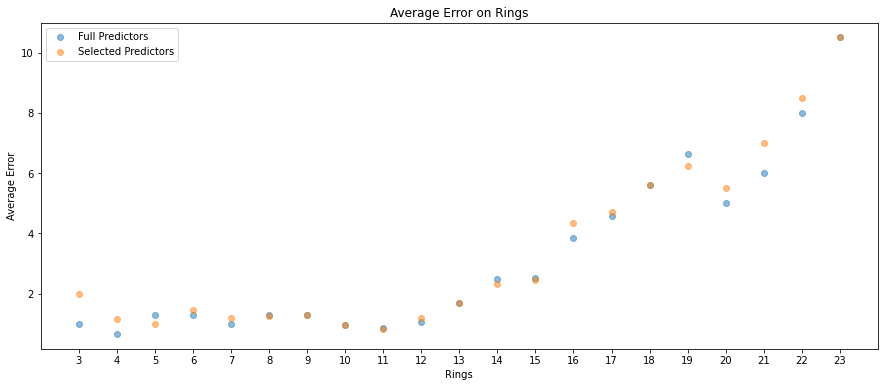

In [46]:
rings = np.arange(3,24,1)
plt.figure(figsize=(15,6))
plt.scatter(rings,ring_avg_errors['Full Random Forest Error'], alpha=0.5, label='Full Predictors')
plt.scatter(rings,ring_avg_errors['Selected Random Forest Error'], alpha=0.5, label='Selected Predictors')
plt.xlabel("Rings")
plt.ylabel("Average Error")
plt.xticks(rings)
plt.legend()
plt.title("Average Error on Rings")

From the above plot and the Ring average error data above, we can observe that bigger ring values tend to have larger ring values. To test the hypothesis if the larger error is due to the number of training instances of larger ring values, we can create a table to get the counts of observations in each ring category. 

Upon observation of the counts below, there is a good chance that the high error in larger ring size observations are due to the fact that there are minimal number of observations in those categories compared to the smaller ones.

In [47]:
pd.DataFrame({'Counts':y_train.value_counts().sort_index()}).T

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,29.0
Counts,1,1,14,45,94,214,336,465,599,544,...,24,24,13,4,7,2,1,1,2,1


**Bagging Regressor**

In this section, we implement a bagging regressor with 500 SVM regressors as the base estimators. An important step is to scale the data before application of any Support Vector models.

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
std_scaler = StandardScaler() # call the scaler function

num_pipeline = Pipeline([ # pipeline for scaling the data
    ('std_scaler', StandardScaler())
])

X_train_scaled = pd.DataFrame(num_pipeline.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(num_pipeline.fit_transform(X_test), columns=X_train.columns)

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# SVR Base Model
svr_model = SVR()
svr_base_train_rmse, svr_base_test_rmse = train_test_rmse(svr_model, X_train_scaled, y_train, X_test_scaled, y_test)
print(f'Base Model SVR: Training RMSE: {svr_base_train_rmse}, Test RMSE: {svr_base_test_rmse}')

Base Model SVR: Training RMSE: 2.1659583151052084, Test RMSE: 2.149885943341644


In [304]:
# Manually find the optimal hyperparams, starting with the degree of polynomial.
poly_degree = np.arange(1,8)

for degree in poly_degree:
    svr_model_deg = SVR(kernel='poly',degree=degree)
    svr_base_train_rmse, svr_base_test_rmse = train_test_rmse(svr_model_deg, 
                                                              X_train_scaled, y_train, 
                                                              X_test_scaled, y_test)
    print(f'Degree {degree} SVR - Training RMSE: {svr_base_train_rmse}, Test RMSE: {svr_base_test_rmse}')

Degree 1 SVR - Training RMSE: 2.2851907920415675, Test RMSE: 2.2962419891481978
Degree 2 SVR - Training RMSE: 2.7341322468343146, Test RMSE: 2.8086219497786296
Degree 3 SVR - Training RMSE: 2.5048431104346176, Test RMSE: 2.5083592303950675
Degree 4 SVR - Training RMSE: 2.806820489928631, Test RMSE: 2.9458158362309135
Degree 5 SVR - Training RMSE: 2.5597152286651346, Test RMSE: 2.6047435565167083
Degree 6 SVR - Training RMSE: 2.7529322278588273, Test RMSE: 2.9973406607662425
Degree 7 SVR - Training RMSE: 2.5398181898375203, Test RMSE: 2.7564626107389727


We observe that using a polynomial kermel for the SVR might not be the best, compared to using a Gaussian RBF. Therefore, we retain using the base SVR for now. Also, we might want to find the best hyperparamters for C and epsilon in the SVR.

In [52]:
from sklearn.model_selection import GridSearchCV

# define the paramters to be searched for the SVR
grid_params_SVR = {'epsilon':np.arange(0,2,0.1),
               'C':np.arange(0.1,2,0.1)} 

# default values for all the hyperparams
svr_model_base = SVR()
grid_search = GridSearchCV(svr_model_base, grid_params_SVR, cv=3, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
svr_optimal = grid_search.best_params_
svr_optimal, grid_search.best_score_

({'C': 1.9000000000000001, 'epsilon': 1.6}, 0.5535622895076475)

In [54]:
svr_model_opt =  SVR(C=1.9000000000000001, epsilon=1.6)
svr_opt_train_rmse, svr_opt_test_rmse = train_test_rmse(svr_model_opt, X_train_scaled, y_train, X_test_scaled, y_test)
print(f'Base Model SVR: Training RMSE: {svr_base_train_rmse}, Test RMSE: {svr_base_test_rmse}')

Base Model SVR: Training RMSE: 2.1659583151052084, Test RMSE: 2.149885943341644


Looks like we don't have an improvement on the test or training RMSE score, so the base model might be the most generalised model, and we retain that.

**Implementing a Bagging Regressor**

In this part, we implement a bagging regressor, based on the optimal SVR hyperparameters that we fit earlier.

In [55]:
# Attach the bagging regressor first
from sklearn.ensemble import BaggingRegressor

# using all predictors
bag_reg = BaggingRegressor(estimator=SVR(), n_estimators=500, random_state=5508,
                          bootstrap=True, max_samples=0.25, max_features=8, n_jobs=-1)
bag_train_rmse, bag_test_rmse, bag_train_pred, bag_test_pred = train_test_rmse(bag_reg, 
                                                                  X_train_scaled, 
                                                                  y_train, 
                                                                  X_test_scaled, 
                                                                  y_test, option='all')

In [56]:
print(f'Bagging SVR: Training RMSE: {bag_train_rmse}, Test RMSE: {bag_test_rmse}')

Bagging SVR: Training RMSE: 2.26493539781095, Test RMSE: 2.2495790852081776


The test set RMSE for the n=500 bagging regressor is given above. The diagram below shows us the ground truth vs actual result, with added noise to show where the main bulk of the estimates are. We observe that the model tends to do well for observations with lower number of rings, but does not do well for the observations towards the higher end. This might be attributed to the fact that there are not enough instances of abalones with more rings . 

Text(0.5, 1.0, 'Ground Truth vs. Predicted (Test Set)')

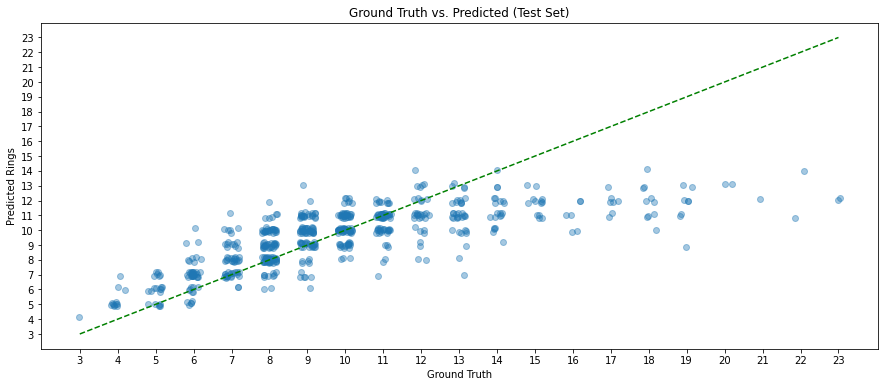

In [57]:
# Bagging Regressor
plt.figure(figsize=(15,6))
jittered_pred = bag_test_pred + np.random.uniform(-0.2, 0.2, len(bag_test_pred))
jittered_truth = y_test + np.random.uniform(-0.2, 0.2, len(y_test))
plt.scatter(jittered_truth, jittered_pred, alpha=0.4, marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'g--')
plt.xlabel("Ground Truth")
plt.ylabel("Predicted Rings")
plt.xticks(rings)
plt.yticks(rings)
plt.title("Ground Truth vs. Predicted (Test Set)")

Comparing this with the Random forest regressor, which seems to do slightly better in predicting the observations with more rings. If we compare the test RMSE however, the Bagging SVR (2.25) and the Random Forest (2.17) do not differ much, but might be more consistent with our visuals of estimating the instances of more rings better.

Text(0.5, 1.0, 'Ground Truth vs. Predicted (Test Set)')

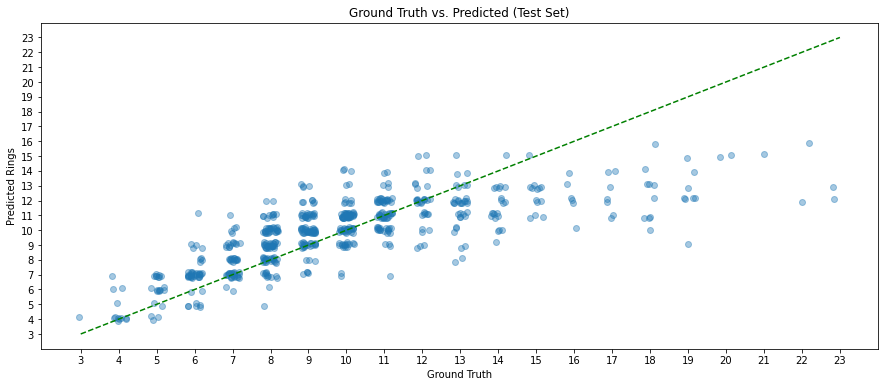

In [348]:
# for the Random Forest Regressor
plt.figure(figsize=(15,6))
jittered_pred = pred_test + np.random.uniform(-0.2, 0.2, len(pred_test))
jittered_truth = y_test + np.random.uniform(-0.2, 0.2, len(y_test))
plt.scatter(jittered_truth, jittered_pred, alpha=0.4, marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'g--')
plt.xlabel("Ground Truth")
plt.ylabel("Predicted Rings")
plt.xticks(rings)
plt.yticks(rings)
plt.title("Ground Truth vs. Predicted (Test Set)")